**IMPORT REQUIRED LIBRARIES**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**READ THE DATASET**

In [3]:
skin=pd.read_excel("/content/synthetic_skincare_data.xlsx")

In [4]:
skin.head()

,Cust.ID,Purchase_Date,Gender,Age_Group,Skin_Type,Complaint,Primary_Ingredient,Usage_Frequency_Per_Week,Severity_Rating,Satisfaction_Rating,Product_ID,Product_Name,Sustainability_Rating,Product_Rating,Repurchase_Intention,Promotional_Offers_Used,Preferred_Purchase_Channel
0,1,2024-07-19,Female,26-35,Oily,Skin Irritation,Hyaluronic Acid,7.0,3.0,4.0,1221.0,Moisturizing Lotion,1.0,3.0,No,Yes,In-Store
1,2,2024-09-10,Female,60+,Oily,Skin Irritation,Hyaluronic Acid,7.0,5.0,2.0,1050.0,Vitamin C Serum,5.0,3.0,Yes,Yes,In-Store
2,3,2024-04-15,Male,36-45,Sensitive,No Visible Results,Hyaluronic Acid,7.0,4.0,1.0,1808.0,Moisturizing Lotion,5.0,1.0,No,Yes,Third-Party Retailer
3,4,2024-09-20,Female,26-35,Sensitive,Skin Irritation,Glycolic Acid,3.0,4.0,5.0,1997.0,Hydrating Cream,2.0,5.0,Yes,No,In-Store
4,5,2024-08-13,Male,18-25,Normal,Skin Irritation,Salicylic Acid,5.0,3.0,4.0,1461.0,SPF Sunscreen,1.0,1.0,No,Yes,In-Store


In [5]:
skin['Cust.ID'].sum()

55151253

In [6]:
skin.shape

(10502, 17)

In [7]:
skin.columns

Index(['Cust.ID', 'Purchase_Date', 'Gender', 'Age_Group', 'Skin_Type',
       'Complaint', 'Primary_Ingredient', 'Usage_Frequency_Per_Week',
       'Severity_Rating', 'Satisfaction_Rating', 'Product_ID', 'Product_Name',
       'Sustainability_Rating', 'Product_Rating', 'Repurchase_Intention',
       'Promotional_Offers_Used', 'Preferred_Purchase_Channel'],
      dtype='object')

In [8]:
skin['Gender'].unique()

array(['Female', 'Male', 'Other', nan], dtype=object)

In [9]:
skin['Gender'].value_counts()

,count
Gender,
Female,6101
Male,4197
Other,202


**GENDER WISE COMPLAINTS**

In [10]:
# Gender-wise complaints count
gender_complaints = skin.groupby('Gender')['Complaint'].count().reset_index()

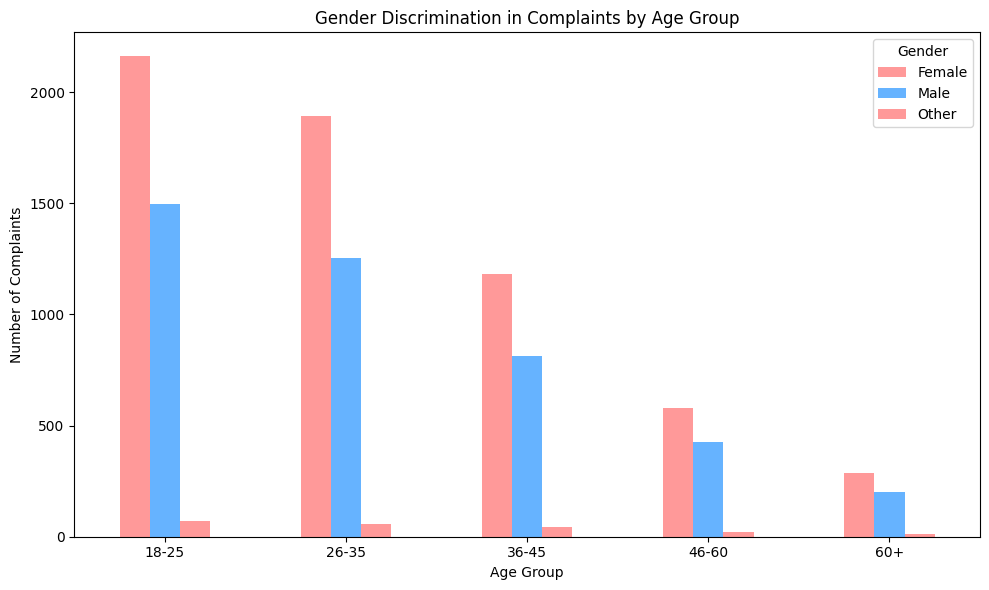

In [11]:
complaints_by_age_gender =skin.groupby(['Age_Group', 'Gender'])['Complaint'].count().reset_index()

complaints_by_age_gender.rename(columns={'Complaint': 'Complaint_Count'}, inplace=True)

pivot_table = complaints_by_age_gender.pivot(index='Age_Group', columns='Gender', values='Complaint_Count').fillna(0)

pivot_table.plot(kind='bar', stacked=False, figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Gender Discrimination in Complaints by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Complaints')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [12]:
# Group by Product_ID and Product_Name to count complaints
product_complaints = skin.groupby(['Product_ID', 'Product_Name'])['Complaint'].count().reset_index()

# Rename column for clarity
product_complaints.rename(columns={'Complaint': 'Complaint_Count'}, inplace=True)

# Sort products by the number of complaints in descending order
product_complaints = product_complaints.sort_values(by='Complaint_Count', ascending=False)

# Display top products with the highest complaints
print(product_complaints)


      Product_ID         Product_Name  Complaint_Count
2735      1629.0    Exfoliating Scrub                8
3247      1747.0    Exfoliating Scrub                8
3586      1824.0      Hydrating Cream                8
1074      1244.0    Exfoliating Scrub                7
1294      1294.0      Hydrating Cream                7
...          ...                  ...              ...
1435      1327.0  Moisturizing Lotion                1
3172      1729.0      Hydrating Cream                1
3171      1729.0    Exfoliating Scrub                1
1437      1328.0    Exfoliating Scrub                1
0         1000.0    Exfoliating Scrub                1

[4344 rows x 3 columns]


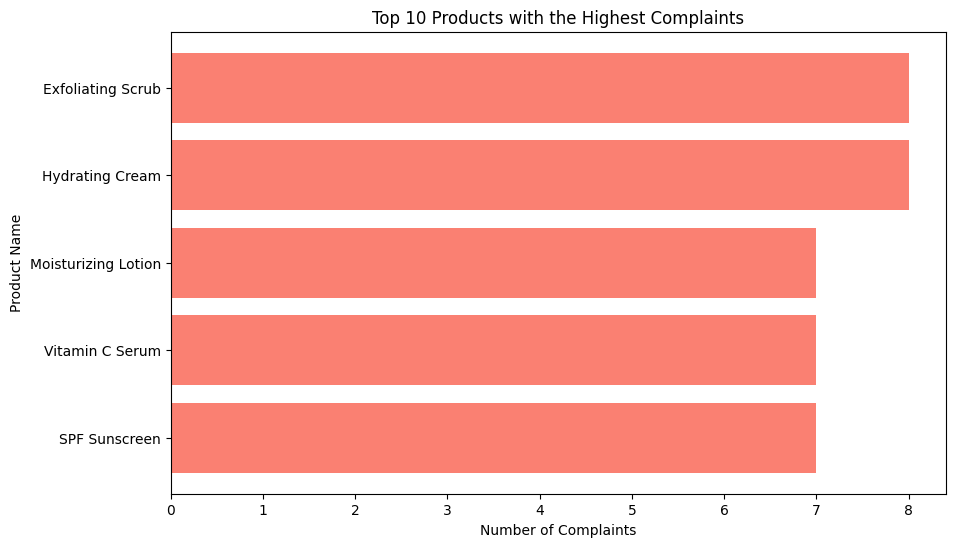

In [13]:
top_products = product_complaints.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_products['Product_Name'], top_products['Complaint_Count'], color='salmon')
plt.xlabel('Number of Complaints')
plt.ylabel('Product Name')
plt.title('Top 10 Products with the Highest Complaints')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [14]:
# Filter products with low ratings (assuming 3 or below is considered low rating)
low_rated_products = skin[skin['Product_Rating'] <= 3]

# Group by Product_ID and Product_Name to see the average rating and number of complaints
low_rated_summary = low_rated_products.groupby(['Product_ID', 'Product_Name'])['Product_Rating'].mean().reset_index()

# Sort by Product Rating in ascending order (lowest first)
low_rated_summary = low_rated_summary.sort_values(by='Product_Rating')

# Display products with low ratings
print(low_rated_summary)

      Product_ID         Product_Name  Product_Rating
1296      1364.0  Moisturizing Lotion             1.0
1289      1362.0      Hydrating Cream             1.0
1287      1361.0        SPF Sunscreen             1.0
1284      1361.0    Exfoliating Scrub             1.0
1278      1359.0  Moisturizing Lotion             1.0
...          ...                  ...             ...
1546      1432.0  Moisturizing Lotion             3.0
1529      1427.0        SPF Sunscreen             3.0
1526      1427.0    Exfoliating Scrub             3.0
1518      1424.0      Vitamin C Serum             3.0
1786      1504.0        SPF Sunscreen             3.0

[3574 rows x 3 columns]


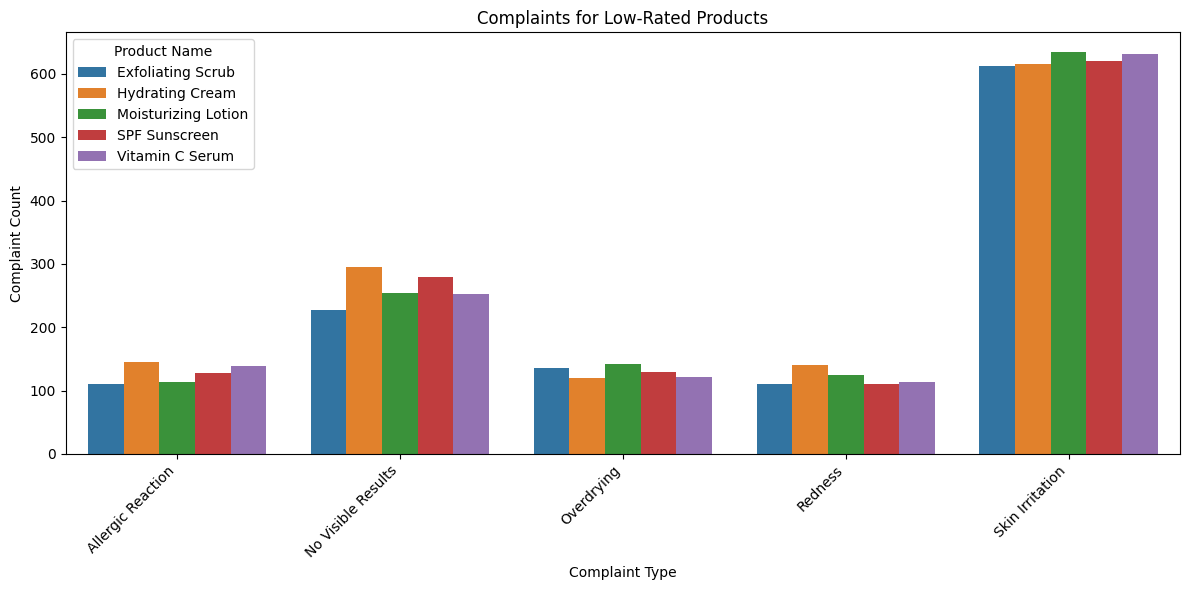

In [15]:
# Get the complaints for low-rated products
low_rated_complaints = low_rated_products.groupby(['Product_Name', 'Complaint']).size().reset_index(name='Complaint_Count')

# Plot complaints for low-rated products
plt.figure(figsize=(12, 6))
sns.barplot(data=low_rated_complaints, x='Complaint', y='Complaint_Count', hue='Product_Name')
plt.xticks(rotation=45, ha='right')
plt.title('Complaints for Low-Rated Products')
plt.xlabel('Complaint Type')
plt.ylabel('Complaint Count')
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()


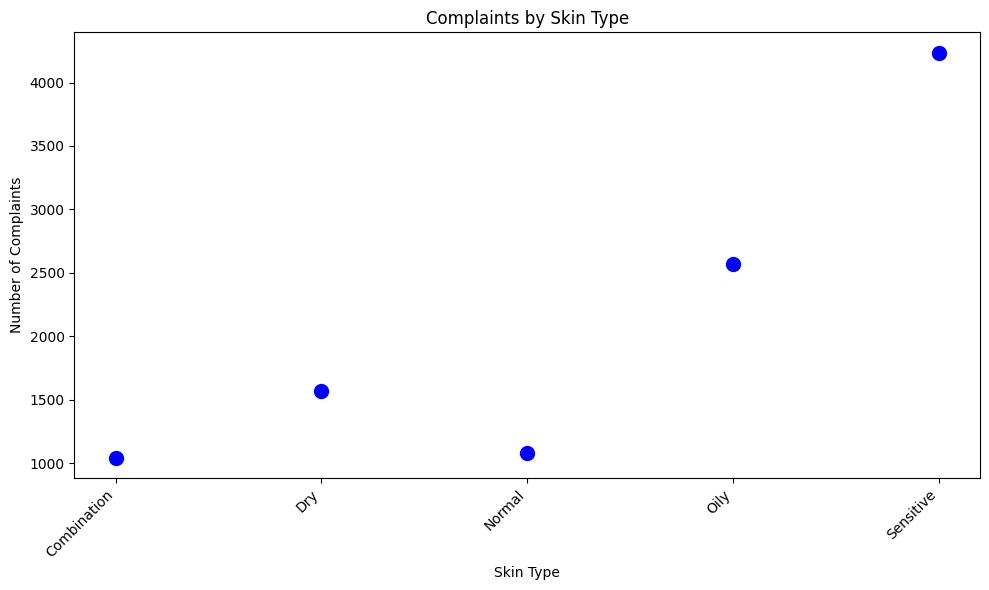

In [16]:
# Group data by Skin_Type and count the number of complaints
complaints_by_skin = skin.groupby('Skin_Type')['Complaint'].count().reset_index()

# Create scatter plot
plt.figure(figsize=(10, 6))

# Create a scatter plot using skin types as x, number of complaints as y
plt.scatter(complaints_by_skin['Skin_Type'], complaints_by_skin['Complaint'], color='blue', s=100)

plt.title('Complaints by Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()